In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random
sns.set()

In [2]:
nodos = range(1,100)
tiempos = [random.normalvariate(n**2,50) for n in nodos]
complejidad = [1500 + (n**2) for n in nodos]

df = pd.DataFrame({'Elementos': nodos, 'Tiempo (milisegundos)': tiempos, 'Complejidad n^n': complejidad})

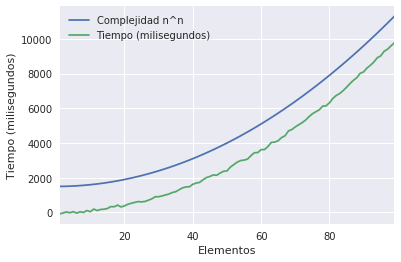

In [3]:
plt.clf()
df.plot(x='Elementos')
plt.ylabel('Tiempo (milisegundos)')
plt.show()

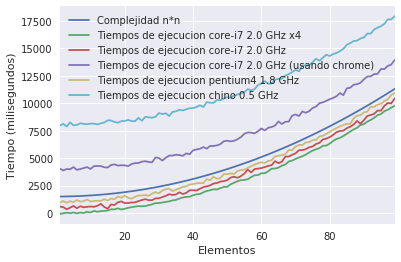

In [4]:
df2 = pd.DataFrame()

tiempos1 = map(lambda x: random.normalvariate(500,100) + random.normalvariate(x**2,50), nodos)
tiempos2 = map(lambda x: random.normalvariate(1000,100) + random.normalvariate(x**2,50), nodos)
tiempos3 = map(lambda x: random.normalvariate(4000,100) + random.normalvariate(x**2,50), nodos)
tiempos4 = map(lambda x: random.normalvariate(8000,100) + random.normalvariate(x**2,50), nodos)

df2['Elementos'] = nodos
df2['Complejidad n*n'] = complejidad
df2['Tiempos de ejecucion core-i7 2.0 GHz x4'] = tiempos
df2['Tiempos de ejecucion core-i7 2.0 GHz'] = tiempos1
df2['Tiempos de ejecucion core-i7 2.0 GHz (usando chrome)'] = tiempos3
df2['Tiempos de ejecucion pentium4 1.8 GHz'] = tiempos2
df2['Tiempos de ejecucion chino 0.5 GHz'] = tiempos4

plt.clf()
df2.plot(x='Elementos')
plt.ylabel('Tiempo (milisegundos)')
plt.show()

## ¿Como hago entonces para comparar peras con manzanas si es lo que necesito?
En algunos casos donde conocemos uno de los datos y necesitamos estudiar otro, si sabemos que existe una correlación entre dos o más variables, lo que podemos hacer es mirar la correlación entre los datos. Es importante destacar que la valides de los resultados depende fuertemente del conocimiento previo entre la relación de las variables, dicho de otro modo, que la correlación existente tenga una explicación de causalidad y no de casualidad.

Algunos ejemplos:
- La cantidad de muertos por ahogo está fuertemente correlacionada con la venta de helado. No hay causalidad pero tampoco casualidad, lo que sucede es que ambas variables están correlacionadas e influenciadas por el calor y cuanto más calor, más se mete la gente al mar y más compra helado, hay una causalidad común.
- La cantidad de manzanas producidas por un manzano esta fuertemente correlacionada con la cantidad de peras producidas por un peral. Por el mismo motivo que en el ejemplo anterior, ambas plantas dan frutas en el mismo momento del año.
- El tiempo de corrida de un programa esta fuertemente correlacionado con la complejidad del algoritmo.

## Coeficiente de correlación de pearson (Wikipedia)
![pearson](img/pearson.png)
![pearson](img/pearson_2.png)

In [5]:
df3 = pd.DataFrame()

df3['Elementos'] = nodos
df3['Tiempos'] = tiempos
df3['Complejidad n^2'] = [100 + random.normalvariate(n**2,50) for n in nodos]
df3['Complejidad n^3'] = [100 + random.normalvariate(n**3,50) for n in nodos]
df3['Complejidad n^50'] = [100 + random.normalvariate(n**50,50) for n in nodos]

In [6]:
plt.clf()
correlation = df3.corr()
correlation

Elementos   Tiempos  Complejidad n^2  Complejidad n^3  \
Elementos          1.000000  0.968877         0.969142         0.917562   
Tiempos            0.968877  1.000000         0.999696         0.986094   
Complejidad n^2    0.969142  0.999696         1.000000         0.985571   
Complejidad n^3    0.917562  0.986094         0.985571         1.000000   
Complejidad n^50   0.338926  0.427157         0.424878         0.497038   

                  Complejidad n^50  
Elementos                 0.338926  
Tiempos                   0.427157  
Complejidad n^2           0.424878  
Complejidad n^3           0.497038  
Complejidad n^50          0.000000

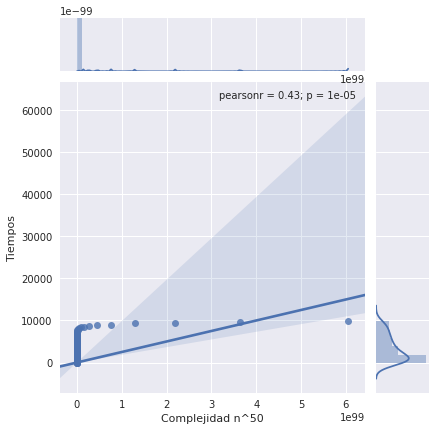

In [7]:
sns.jointplot(df3['Complejidad n^50'], df3['Tiempos'], kind="reg")
plt.show()

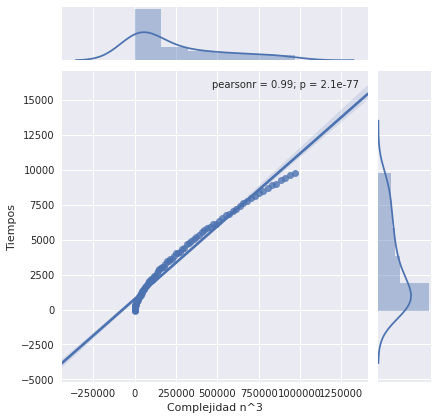

In [8]:
sns.jointplot(df3['Complejidad n^3'], df3['Tiempos'], kind="reg")
plt.show()

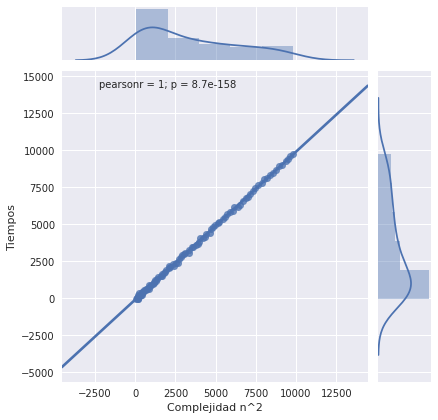

In [9]:
sns.jointplot(df3['Complejidad n^2'], df3['Tiempos'], kind="reg")
plt.show()

## Otra forma de analizar complejidad
También se puede aplicar la inversa de la función de complejidad que se quiere contrastar a los datos de los tiempos obtenidos para ver si eso se combierte en una función lineal.

** Alternativamente: ** También se puede dividir los tiempos de ejecución por la función de complejidad para ver que eso devuelve alguna constante con ruido.

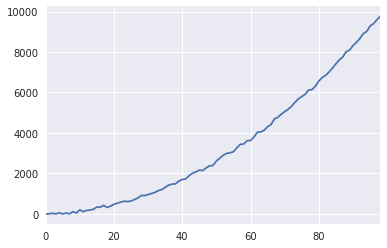

In [10]:
df3['Tiempos'].apply(lambda x: x ** (1. / 1) if x >= 0 else -1).plot()
plt.show()

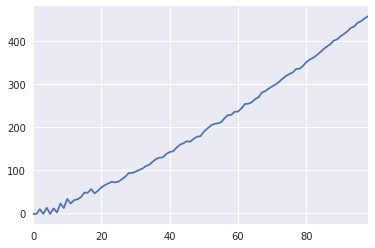

In [11]:
df3['Tiempos'].apply(lambda x: x ** (1. / 1.5) if x >= 0 else -1).plot()
plt.show()

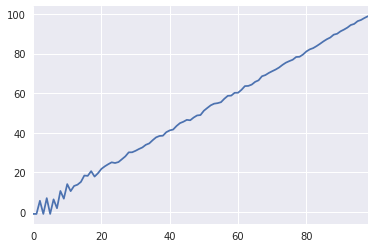

In [12]:
df3['Tiempos'].apply(lambda x: x ** (1. / 2) if x >= 0 else -1).plot()
plt.show()

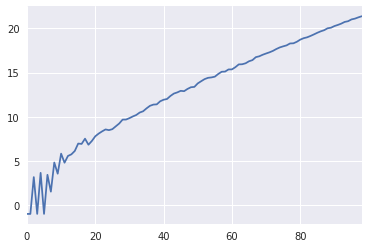

In [13]:
df3['Tiempos'].apply(lambda x: x ** (1. / 3) (1. / 3) if x >= 0 else -1).plot()
plt.show()

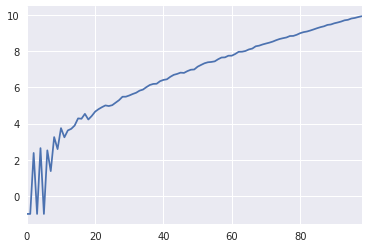

In [14]:
df3['Tiempos'].apply(lambda x: x ** (1. / 4) if x >= 0 else -1).plot()
plt.show()